In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
#โหลด csv เข้าไปใน Python Pandas
df = pd.read_csv('train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'reg', 'low fat'],['LF','REG','REG','LF'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,REG,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,REG,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,REG,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

In [4]:
#เช็คว่ามีข้อมูลที่หายไปไหม ถ้าเป็นตัวเลขให้ใส่ด้วยค่าเฉลี่ย ถ้าเป็น Categorical ให้ใส่ด้วย Category อันที่มีความถี่สูงที่สุด
avg = df['Item_Weight'].mean()
avg

12.857645184136183

In [5]:
df['Item_Weight'].fillna(value=avg, inplace=True)
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [6]:
df.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
# ทำ dummies สำหรับ Categorical data และ สร้าง train/test split ด้วย 80:20 ratio
df_new = pd.get_dummies(df, drop_first=True)
df_new

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,1,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [9]:
X = df_new.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_new['Item_Outlet_Sales'])

In [10]:
y = np.array(y).reshape(-1,1) #X ไม่ต้องreshapeเพราะเป็นDataframe (yเป็นseries)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=70)

In [14]:
#54 สร้างโมเดลแบบ Decision Tree Regression โดยใช้ทุก features
from sklearn.tree import DecisionTreeRegressor
dtree_regressor = DecisionTreeRegressor()
dtree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
pred = dtree_regressor.predict(X_test)
pred

array([6024.1584, 3225.801 , 1342.2528, ...,  767.0016, 2966.139 ,
       1450.1124])

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
#55 ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 score: ', r2_score(y_test, pred))

MAE:  1088.3487008797654
MSE:  2420968.426354158
RMSE:  1555.9461514956608
R2 score:  0.16801439344242397


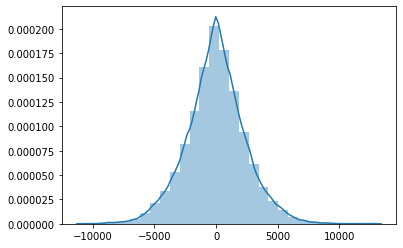

In [19]:
#56 สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results และอธิบายความหมาย
sns.distplot((y_test - pred), bins=30)

In [23]:
#57 สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย
dict_compare ={'Sale':y_test.flatten(), 'Predicted':pred.flatten()}
df_compare = pd.DataFrame(dict_compare)
df_compare

,Sale,Predicted
0,3243.7776,6024.1584
1,3014.7424,3225.8010
2,2799.6890,1342.2528
3,1328.2710,1347.5792
4,6410.3224,1068.6090
...,...,...
1700,306.2680,153.1340
1701,2656.5420,2125.2336
1702,774.9912,767.0016
1703,492.6920,2966.1390


In [24]:
print(df_compare.to_string())

            Sale   Predicted
0      3243.7776   6024.1584
1      3014.7424   3225.8010
2      2799.6890   1342.2528
3      1328.2710   1347.5792
4      6410.3224   1068.6090
5      1211.7560   4101.3280
6       908.1512    649.8208
7      1640.5312   1534.0032
8      2237.0880   2808.3444
9       379.5060    756.3488
10     1846.9292    193.0820
11     2375.5744   2770.3938
12     3691.1952   1964.7758
13      595.2252    196.4110
14     3235.7880   3205.1612
15      516.6608   3983.4814
16     1922.8304   1821.6288
17      759.0120    366.1900
18      656.4788    540.6296
19     1603.9122   1938.8096
20     4362.3216   3111.9492
21     1725.7536   1637.8680
22     1037.3164    873.5296
23      143.8128    147.1418
24     2137.8838   3124.5994
25     2956.1520   1609.9044
26     4579.3724   9562.2196
27     1581.9408   3705.1770
28     1947.4650   2588.6304
29      424.7804    484.7024
30     6391.6800   6021.4952
31      647.1576    262.3252
32     2852.2872   1629.8784
33     2143.87

In [26]:
#58 หา Correlation จาก dataframe ข้อ 57
df_compare.corr()

,Sale,Predicted
Sale,1.000000,0.584022
Predicted,0.584022,1.000000
